# Projeto de Ciência de Dados

### Etapas do Desenvolvimento do Projeto:
1. Entendimento do Desafio Apresentado<br>
2. Entedimento de Negócio da Empresa/Área<br>
3. Extração e Obtenção de Dados<br>
4. Ajuste de Dados (Limpeza de Dados)<br>
5. Análise Exploratória<br>
6. Modelagem e Algoritmos<br>
7. Interpretação dos Resultados<br>
8. Deploy/Produção<br>

# Projeto Airbnb Rio de Janeiro - Previsão de Preço de Imóvel para Clientes

### Contexto
Airbnb é uma ferramenta de locação onde pessoas com imóveis ofertam seus espaços por meio de diárias. <br><br>
A orferta é disponibilizada em um aplicativo pelo host, onde o cliente define nos filtros de busca os imóveis que mais se enquadram com as suas necessidades. <br><br>
No anúncio fornecido, o host descreve as características principais do seu imóvel, como quantidade de quartos, banheiros, se há ou não cozinha, dentre outras especificidades de acomodação, que serão usadas na busca feita pelo cliente.

### Objetivo do Projeto
O objetivo do projeto é criar um modelo de previsão que permita: <br>
1. Ao dono do imóvel, saber quanto deve cobrar na diária do seu imóvel;<br>
2. Ao cliente, saber se o preço do imóvel que procura é atrativo ou não, se comparado com outras opções disponíveis.

### Créditos e Referências

Base de Dados retiradas do site kaggle: https://www.kaggle.com/datasets/allanbruno/airbnb-rio-de-janeiro <br><br>
O projeto está sendo desenvolvido como parte do portfólio do curso de Python da plataforma Hashtag Treinamentos.<br><br>

### Expectativas Iniciais

1. A sazonalidade pode ser um fator crucial para a análise, uma vez que a quantidade de turistas do Rio de Janeiro é maior em meses de férias e feriados prolongados.<br>
2. A localização é outro fator importante para a formação do preço, e áreas turísticas, seguras e com atrativos naturais são mais caras. <br>
3. As funcionalidades e acomodações do imóvel impactam diretamente no preço final do imóvel.

### Importar Bibliotecas e Bases de Dados

In [158]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [2]:
meses = {"jan":1, "fev":2,"mar":3, "abr":4,"mai":5, "jun":6,"jul":7, "ago":8,"set":9, "out":10,"nov":11, "dez":12,}

caminho_bases = pathlib.Path('dataset')

base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv',''))
    
    df = pd.read_csv(caminho_bases / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    base_airbnb = base_airbnb.append(df)

display(base_airbnb)

C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\3353079090.py:14: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\3353079090.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\3353079090.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\3353079090.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\3353079090

C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\3353079090.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\3353079090.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\3353079090.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\3353079090.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\3353079

id                            listing_url       scrape_id  \
0         14063     https://www.airbnb.com/rooms/14063  20180414160018   
1         17878     https://www.airbnb.com/rooms/17878  20180414160018   
2         24480     https://www.airbnb.com/rooms/24480  20180414160018   
3         25026     https://www.airbnb.com/rooms/25026  20180414160018   
4         31560     https://www.airbnb.com/rooms/31560  20180414160018   
...         ...                                    ...             ...   
34324  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
34325  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
34326  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
34327  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
34328  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

      last_scraped                                          name  \
0       2018-04-14                          Living in a Postcard   
1       2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2       2018-04-14              Nice and cozy near Ipanema Beach   
3       2018-04-14     Beautiful Modern Decorated Studio in Copa   
4       2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...            ...                                           ...   
34324   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
34325   2019-09-24                      Alugo para o Rock in Rio   
34326   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
34327   2019-09-24                     Cobertura Cinematografica   
34328   2019-09-24     Quarto em cobertura em frente à praia III   

                                                 summary  \
0      Besides the most iconic's view, our apartment ...   
1      Please note that special rates apply for New Y...   
2      My studio is located in the best  of Ipanema. ...   
3      Our apartment is a little gem, everyone loves ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...   
34325  Confortável apartamento, 2 quartos , sendo 1 s...   
34326  Apartamento quarto e sala COMPLETO para curtas...   
34327                               Cobertura alto nivel   
34328  Quarto em cobertura quadriplex com vista lindí...   

                                                   space  \
0                                                    NaN   
1      - large balcony which looks out on pedestrian ...   
2      The studio is located at Vinicius de Moraes St...   
3      This newly renovated studio (last renovations ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324                                                NaN   
34325  O apartamento estará com mobília completa disp...   
34326  Espaço ideal para até 5 pessoas. Cama de casal...   
34327                                                NaN   
34328                                                NaN   

                                             description experiences_offered  \
0      Besides the most iconic's view, our apartment ...                none   
1      Please note that special rates apply for New Y...                none   
2      My studio is located in the best  of Ipanema. ...                none   
3      Our apartment is a little gem, everyone loves ...                none   
4      This nice and clean 1 bedroom apartment is loc...                none   
...                                                  ...                 ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...                none   
34325  Confortável apartamento, 2 quartos , sendo 1 s...                none   
34326  Apartamento quarto e sala COMPLETO para curtas...                none   
34327                               Cobertura alto nivel         

### Consolidar Bases de Dados

- Como temos muitas colunas, o modelo pode ficar muito lento.
- Além disso, uma análise rápida permite ver que muitas colunas não são necessárias para o modelo de previsão, por isso, vamos excluir algumas colunas da nossa base.
- Tipos de colunas que vamos excluir:
    1. IDs, Links e informações não relevantes para o modelo.
    2. Colunas repetidas ou extremamente parecidas com outra (que dão a mesma informação para o modelo. Ex: Data x Ano/Mês
    3. Colunas preenchidas com texto livre -> Não rodaremos nenhuma análise de palavras ou algo do tipo.
    4. Colunas em que todos ou quase todos os valores são iguais.
    
    
 - Para isso, vamos criar um arquivo no excel com os 1000 primeiros registros e fazer uma análise qualitativa.

In [4]:
print(list(base_airbnb.columns))
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=';')

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

### Se tivermos muitas colunas, identificar quais podemos excluir

- Fazer a análise dentro da base reduzida do excel para determinar se as colunas serão importantes para o modelo.<br>
- As colunas devem ter pelo menos 50% dos dados preenchidos para serem relevantes na análise.<br>
- Após a limpeza das colunas, copiaremos o texto do cabeçalho da base para o modelo para determinar, através do arquivo editado do excel, quais serão as colunas usadas.

In [5]:
#print(base_airbnb[['experiences_offered']].value_counts())

experiences_offered
none                   902210
dtype: int64


In [7]:
#print(base_airbnb['square_feet'].isnull().sum())

888162


### Depois da análise qualitativa das colunas, levando em conta os critérios explicados acima, ficamos com as seguintes colunas:

In [8]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:, colunas]
display(base_airbnb)

host_response_time host_response_rate host_is_superhost  \
0                     NaN                NaN                 f   
1          within an hour               100%                 t   
2          within an hour               100%                 f   
3          within an hour               100%                 f   
4          within an hour               100%                 t   
...                   ...                ...               ...   
34324      within an hour                93%                 f   
34325                 NaN                NaN                 f   
34326  within a few hours                74%                 f   
34327                 NaN                NaN                 f   
34328  a few days or more                38%                 f   

       host_listings_count   latitude  longitude property_type  \
0                      1.0 -22.946854 -43.182737     Apartment   
1                      2.0 -22.965919 -43.178962   Condominium   
2                      1.0 -22.985698 -43.201935     Apartment   
3                      3.0 -22.977117 -43.190454     Apartment   
4                      1.0 -22.983024 -43.214270     Apartment   
...                    ...        ...        ...           ...   
34324                  0.0 -23.003180 -43.342840     Apartment   
34325                  0.0 -22.966640 -43.393450     Apartment   
34326                 32.0 -22.962080 -43.175520     Apartment   
34327                  0.0 -23.003400 -43.341820     Apartment   
34328                  5.0 -23.010560 -43.363350     Apartment   

             room_type  accommodates  bathrooms  ...  \
0      Entire home/apt             4        1.0  ...   
1      Entire home/apt             5        1.0  ...   
2      Entire home/apt             2        1.0  ...   
3      Entire home/apt             3        1.0  ...   
4      Entire home/apt             3        1.0  ...   
...                ...           ...        ...  ...   
34324  Entire home/apt             4        1.0  ...   
34325  Entire home/apt             4        2.0  ...   
34326  Entire home/apt             5        1.0  ...   
34327  Entire home/apt             4        1.0  ...   
34328     Private room             2        0.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                            9.0                    9.0   
1                            9.0                   10.0   
2                           10.0                   10.0   
3                           10.0                   10.0   
4                           10.0                   10.0   
...                          ...                    ...   
34324                        NaN                    NaN   
34325                        NaN                    NaN   
34326                        NaN                    NaN   
34327                        NaN                    NaN   
34328                        NaN                    NaN   

      review_scores_communication review_scores_location review_scores_value  \
0                             9.0                    9.0                 9.0   
1                            10.0                    9.0                 9.0   
2                            10.0                   10.0                 9.0   
3                            10.0                   10.0                 9.0   
4                            10.0                   10.0                 9.0   
...                           ...                    ...                 ...   
34324                         NaN                    NaN                 NaN   
34325                         NaN                    NaN                 NaN   
34326                         NaN                    NaN                 NaN   
34327                         NaN                    NaN                 NaN   
34328                         NaN                    NaN                 NaN   

      instant_bookable is_business_travel_ready          cancellation_policy  

### Tratar valores faltando
- Se uma coluna tiver muitos valores NaN e não forem essenciais para a análise, podemos deletá-las.
- Visualizando os dados, percebemos que existe uma grande disparidade de dados faltantes. As colunas com mais de 300.000 valores NaN foram excluídas da análise.
- Para as outras colunas, como temos muitos dados (mais de 900.000 linhas), vamos excluir as linhas que contém dados NaN.

In [15]:
print(base_airbnb.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


In [16]:
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)
        
print(base_airbnb.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


In [18]:
print(base_airbnb.shape)

(902210, 23)


In [20]:
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)
print(base_airbnb.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


### Verificar tipor de dados em cada coluna
- Printar a primeira linha nos permite analisar se os tipos de dados estão sendo reconhecidos como deveriam pelo Python.

In [24]:
print(base_airbnb.dtypes)
print('-'*100)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
----------------------------------------------------------------------------------------------------
host_is_superhost                                        

#### Colunas que precisam de ajuste
- Analisar pelo arquivo do excel porque o código não reconhece os tipos de dados como deveria (separador de milhares, etc).
- Como preço e extra people estão sendo reconhecidos como objetos ao invés de float, temos que mudar o tipo de variável da coluna.


In [26]:
#price
base_airbnb['price'] = base_airbnb['price'].str.replace('$','')
base_airbnb['price'] = base_airbnb['price'].str.replace(',','')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

#extra people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32)

#verificando os tipo
print(base_airbnb.dtypes)

C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\1069472707.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb['price'] = base_airbnb['price'].str.replace('$','')
C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\1069472707.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$','')


host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


### Análise Exploratória e Tratar Outliers
- Nesta etapa, iremos analisar as features dos dados para:
    1. Determinar se há correlação entre as features e decidir se as manteremos.
    2. Excluir outliers (usaremos como regra: valores abaixo de Q1 - 1.5 x Amplitude e valores acima de Q3 +1.5 x Amplitude). Amplitude = Q3 - Q1. No modelo de Quartil, dividimos os dados em 4 partes: Q1 (0-25%), Q2 (25-50%), Q3 (50-75%) e Q4 (75-100%).
    3. Confirmar se as features fazem sentido no nosso modelo ou se podem ser excluídas.
- Vamos começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valor monetário). Esses são os valores numéricos contínuos.
- Depois vamos analisar as colunas de valores numéricos discretos (accomodates, bedrooms, guests_included, etc.)
- Por fim, vamos avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.

Obs.: Cuidado ao excluir os outliers, pois se não há motivo claro para isso, pode prejudicar a análise.



C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\4088070743.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base_airbnb.corr(),annot=True,cmap='Greens')


<Axes: >

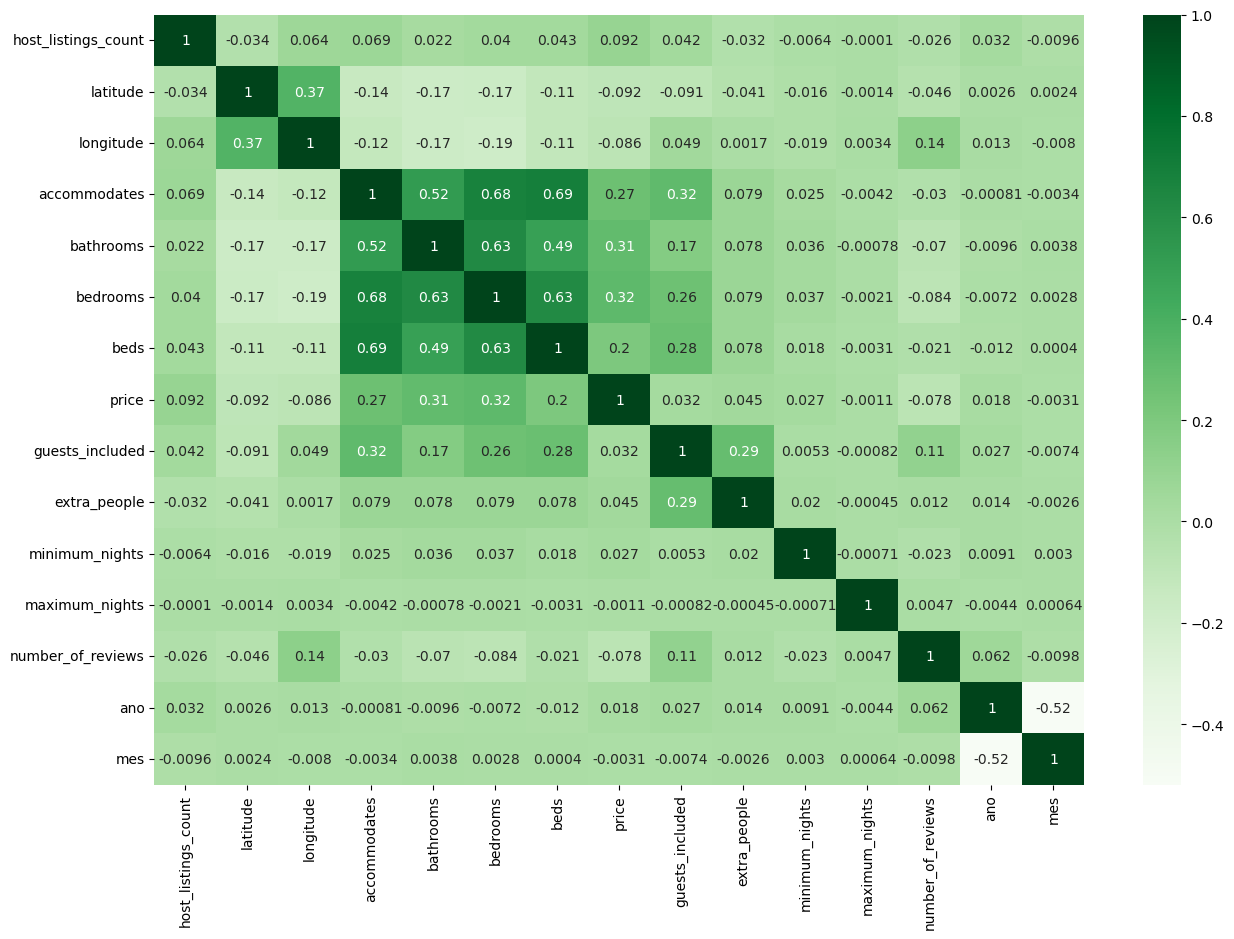

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(base_airbnb.corr(),annot=True,cmap='Greens')

#Pandas já possui uma ferramenta para correlação entre as colunas (corr)
#print(base_airbnb.corr())

- No gráfico acima, não temos nenhuma correlação muito forte, que justifique a exclusão de uma delas. Ex.: 0.9

#### Definição de Funções para Análise de Outliers
Vamos definir algumas funções para ajudar na análise de outliers

In [66]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3-q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

#função para excluir outliers

def excluir_outliers(df,nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >=lim_inf) & (df[nome_coluna] <= lim_sup),:]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

#Checking:
#print(limites(base_airbnb['price']))
#base_airbnb['price'].describe()
#print(601+1.5*(601-151))

In [75]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))    
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.distplot(coluna,hist=True)
    
def grafico_barra(coluna):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index,y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

### price

C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\4288104655.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna,hist=True)


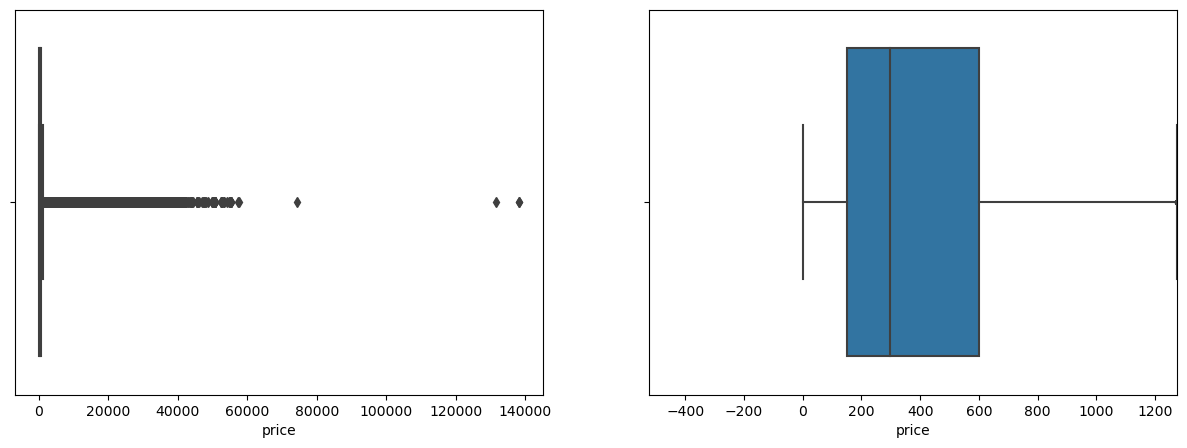

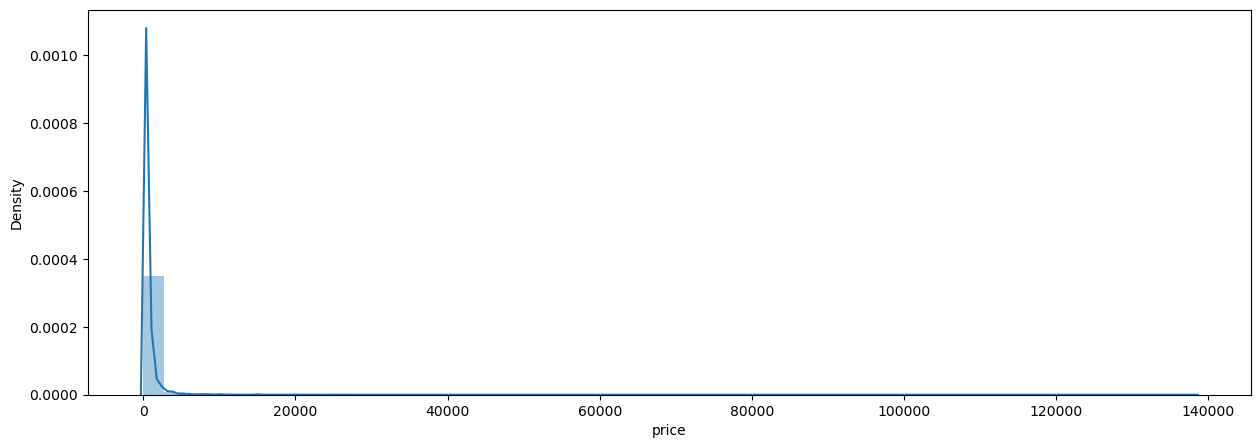

In [59]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

Como estamos construindo um modelo para imóveis comuns, acredito que os valores acima do limite superior serão apenas apartamentos de alto luxo, que não é nosso objetivo principal. Por isso, podemos excluir esses outliers. 

In [67]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'price')
print('{} linhas removidas'.format(linhas_removidas))

87282 linhas removidas


- No exemplo acima, o número de linhas removidas corresponde à aprox. 10% da nossa base, o que é um número alto.
- Cabe a nós determinar se isso não será bom para a nossa análise. Como o objetivo do projeto é analisar os preços de imóveis e clientes "comuns", os outliers podem atrapalhar no resultado.

C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\4288104655.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna,hist=True)


(810427, 23)


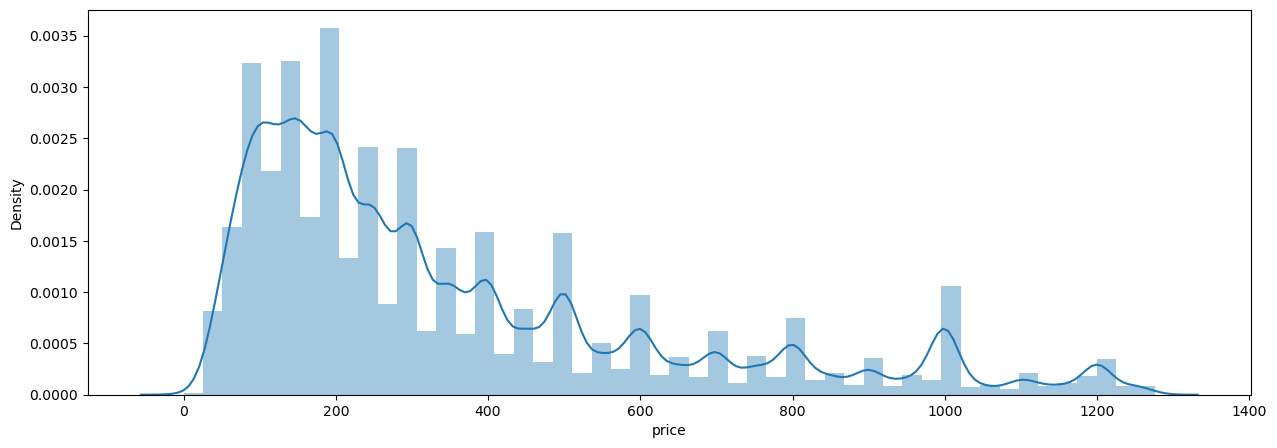

In [70]:
histograma(base_airbnb['price'])
print(base_airbnb.shape)

### extra_people

C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\4288104655.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna,hist=True)


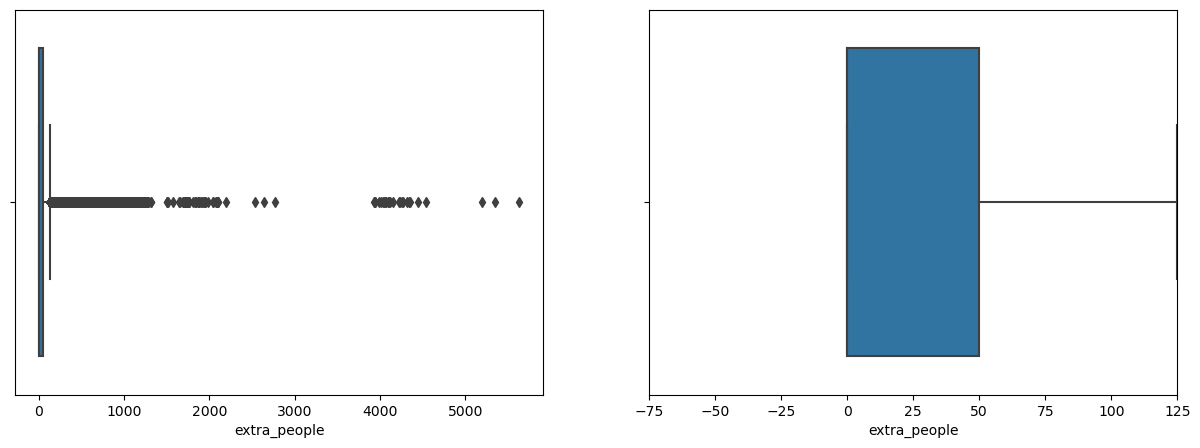

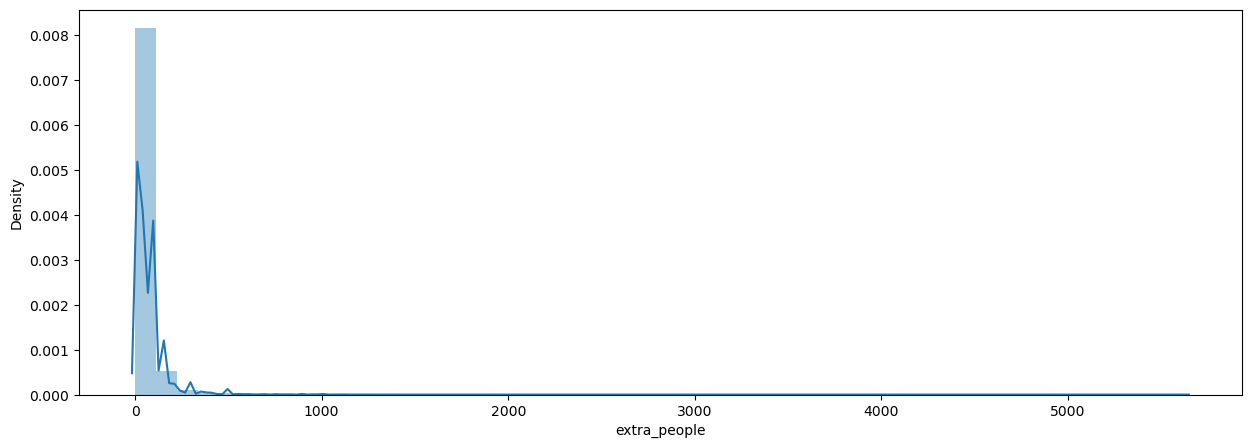

In [71]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [72]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'extra_people')
print('{} linhas removidas'.format(linhas_removidas))

59194 linhas removidas


### host_listings_count

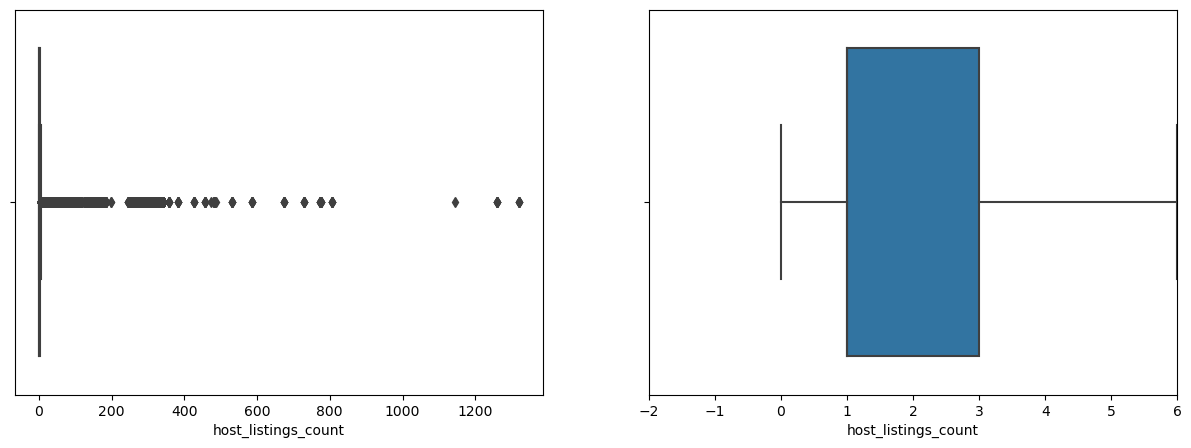

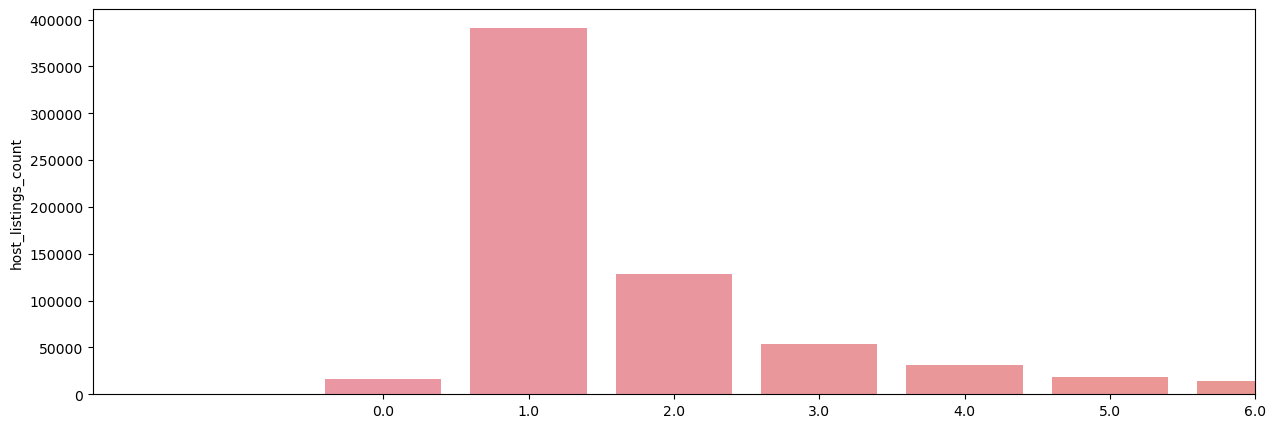

In [76]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

Podemos excluir os outliers porque para o objetivo do nosso projeto, os hosts com mais de 6 imóveis no airbnb não são o público alvo do nosso projeto (podem ser imobiliárias ou profissionais que gerenciam imóveis).

In [77]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'host_listings_count')
print('{} linhas removidas'.format(linhas_removidas))

97723 linhas removidas


### accommodates

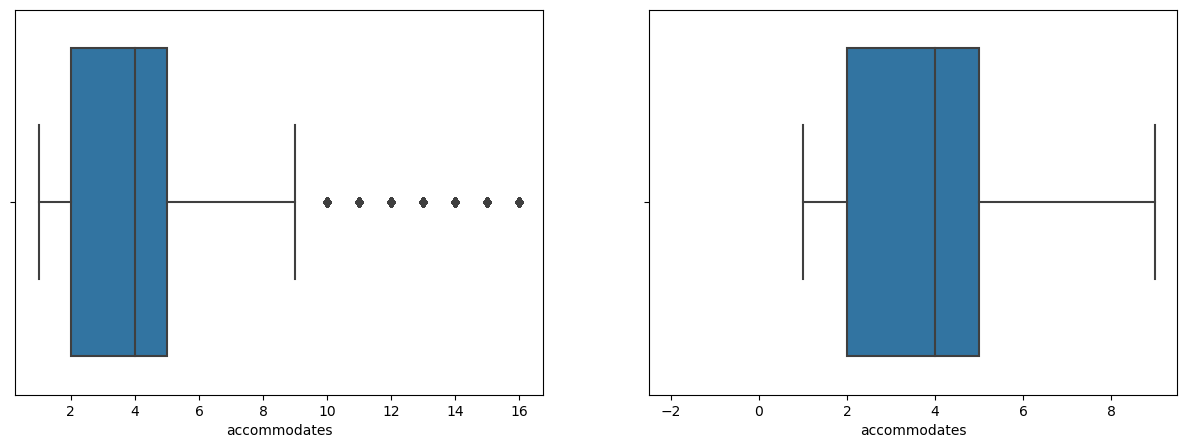

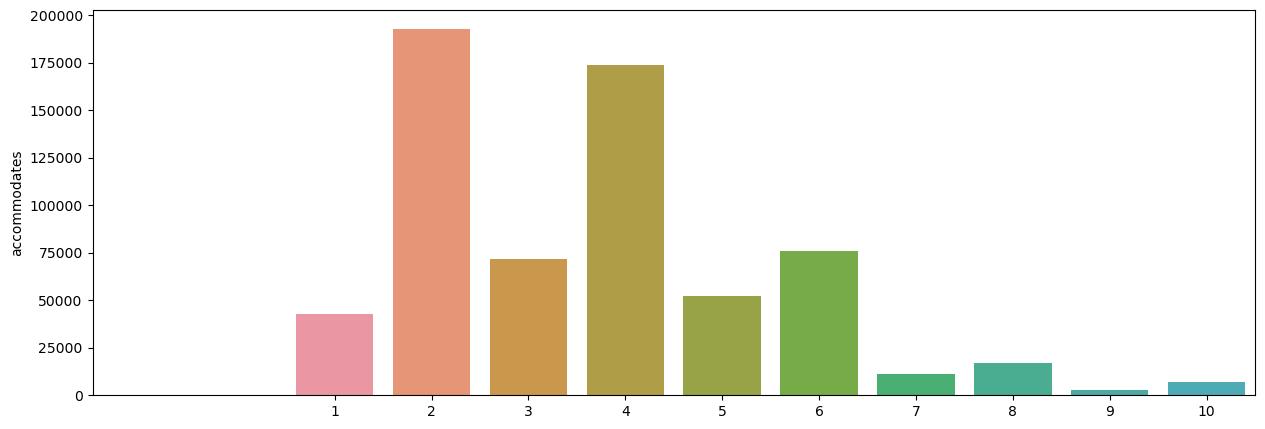

In [78]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [79]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'accommodates')
print('{} linhas removidas'.format(linhas_removidas))

13146 linhas removidas


### bathrooms

<Axes: ylabel='bathrooms'>

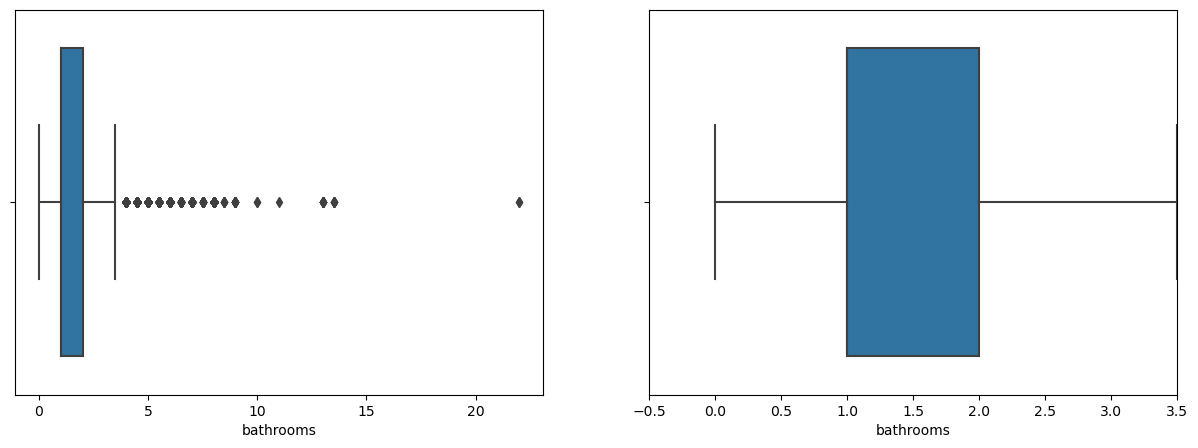

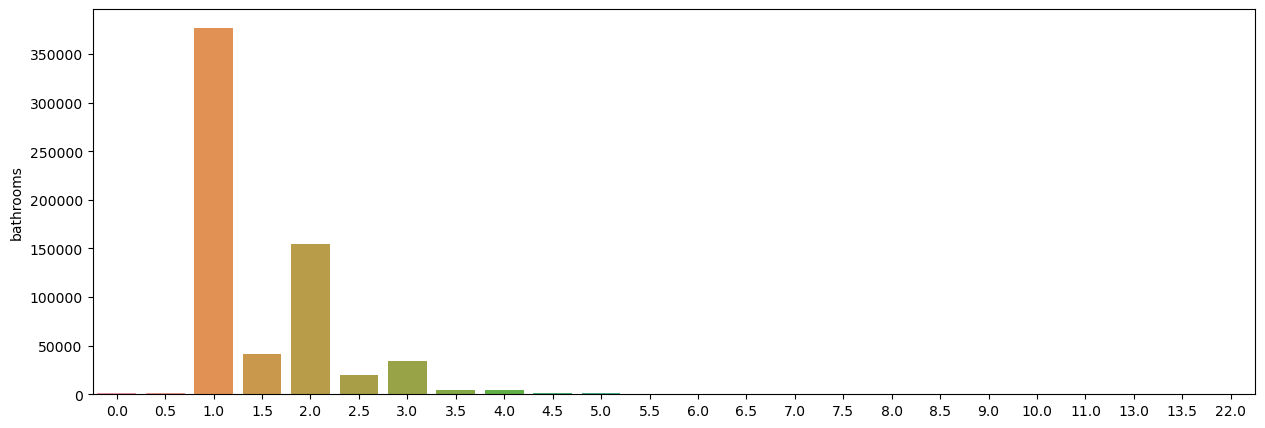

In [83]:
diagrama_caixa(base_airbnb['bathrooms'])

#Para este caso, devido à distorção do gráfico com base no limite, vamos ajustar a plotagem do grafico.

plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index,y=base_airbnb['bathrooms'].value_counts())


In [84]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'bathrooms')
print('{} linhas removidas'.format(linhas_removidas))

6894 linhas removidas


### bedrooms

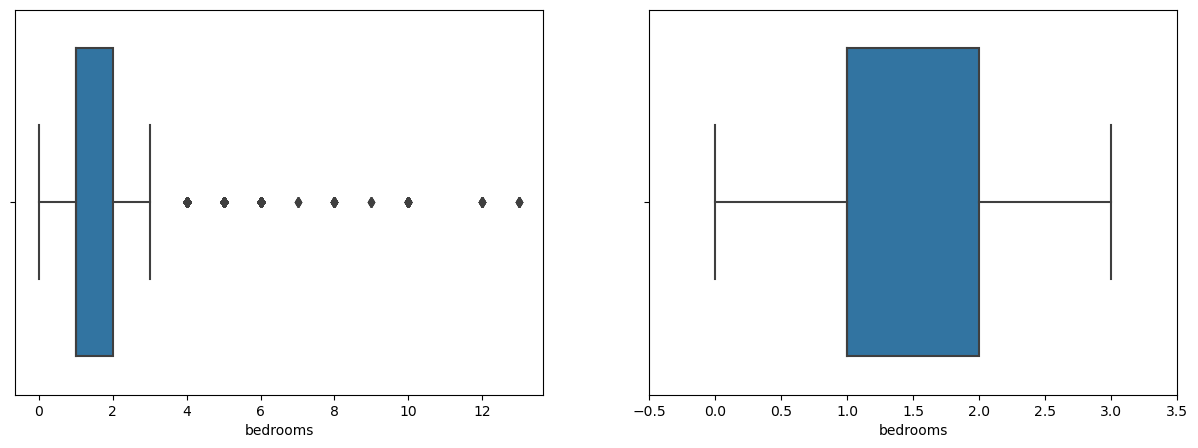

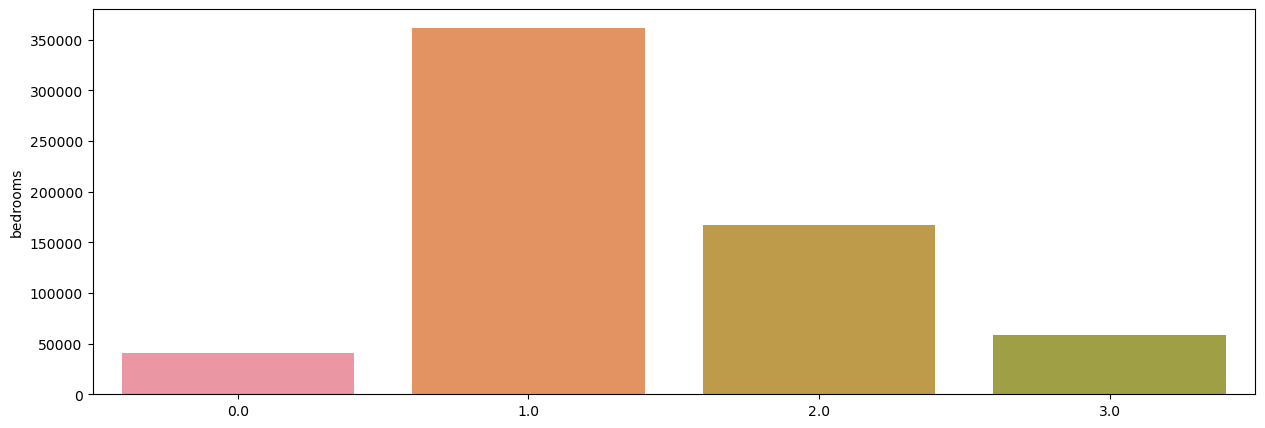

In [85]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [86]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'bedrooms')
print('{} linhas removidas'.format(linhas_removidas))

5482 linhas removidas


### beds

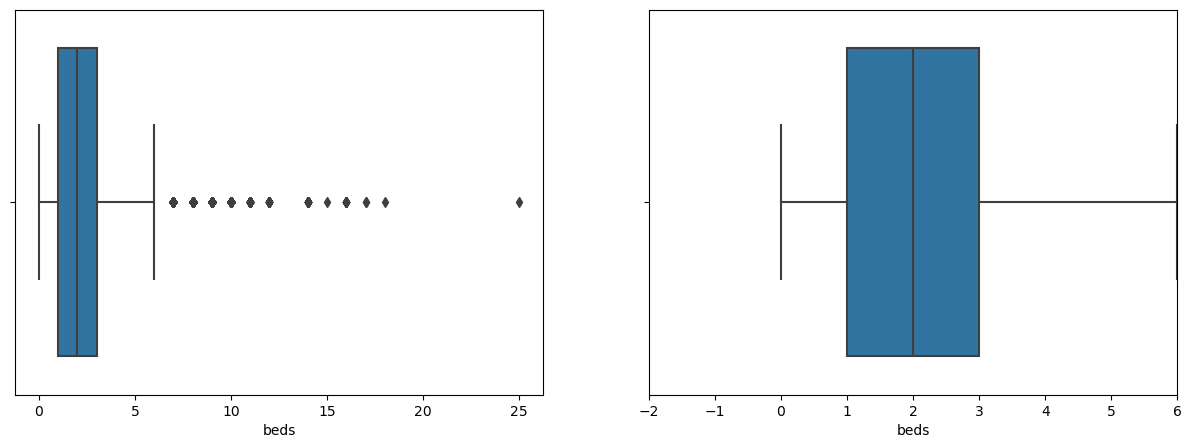

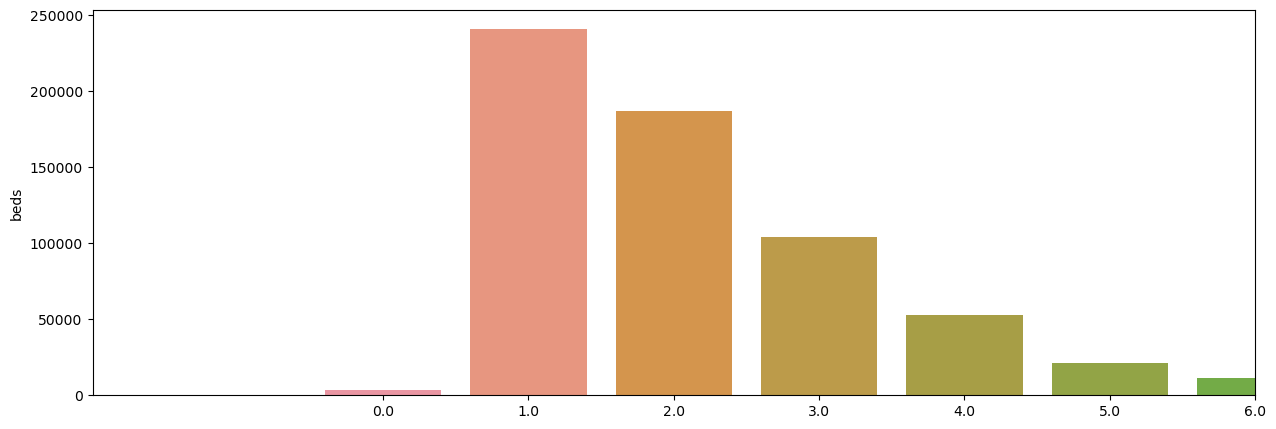

In [88]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [89]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'beds')
print('{} linhas removidas'.format(linhas_removidas))

5622 linhas removidas


### guests_included

C:\Users\20057664\AppData\Local\Temp\ipykernel_19488\1563153234.py:5: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax2.set_xlim(limites(coluna))


<Axes: ylabel='guests_included'>

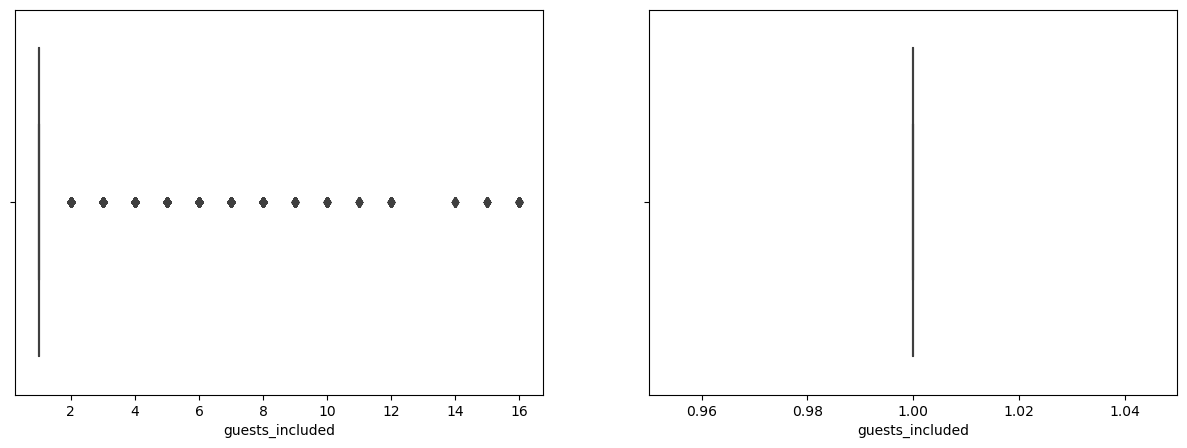

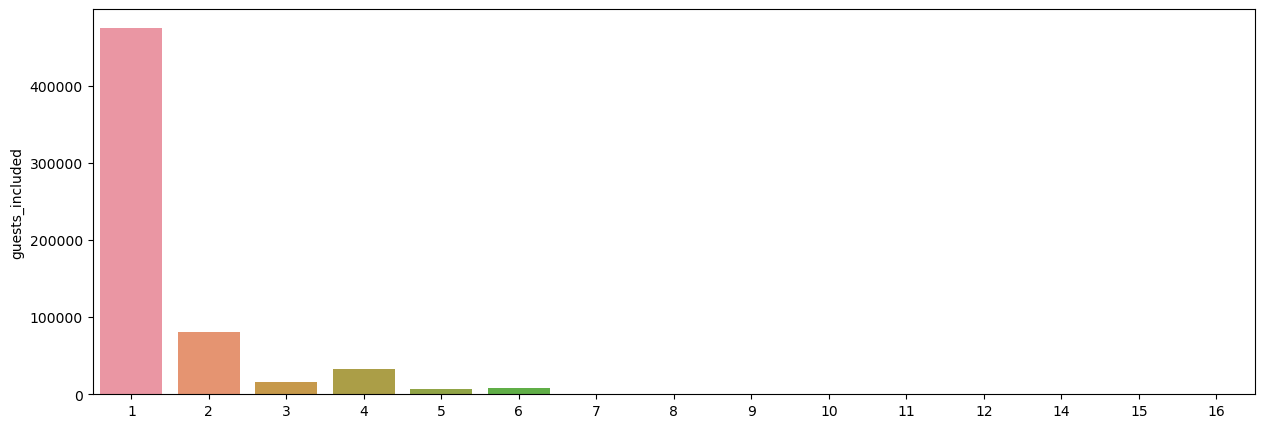

In [90]:
diagrama_caixa(base_airbnb['guests_included'])

#Para este caso, devido à distorção do gráfico com base no limite, vamos ajustar a plotagem do grafico.

plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index,y=base_airbnb['guests_included'].value_counts())

Vamos remover essa feature da análise. Parece que os usuários do Airbnb usam muito o valor padrão como 1 guest included. Isso pode levar o nosso modelo a considerar uma feature que na verdade não é essencial para a definição do preço, por isso, vamos deletar a coluna guests_included da análise.

In [91]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)

base_airbnb.shape

(622366, 22)

### minimum_nights

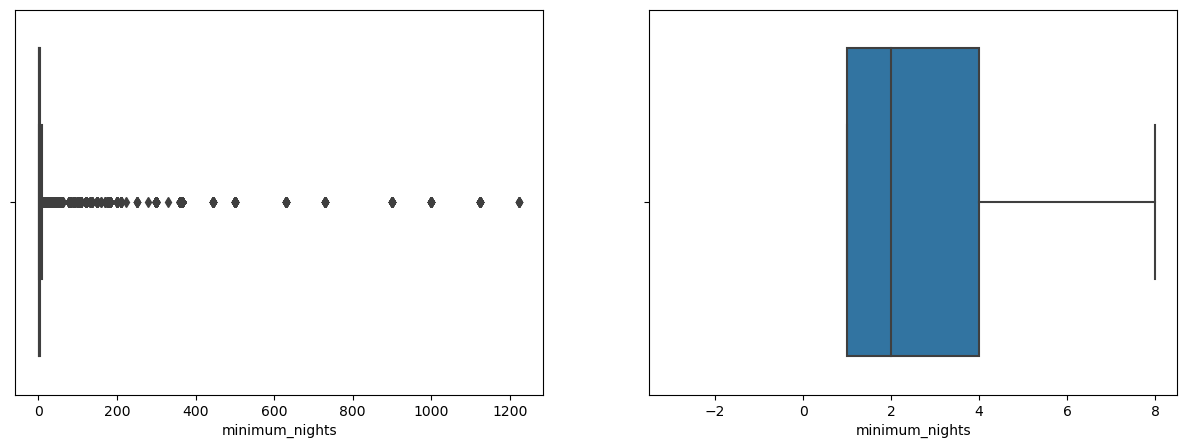

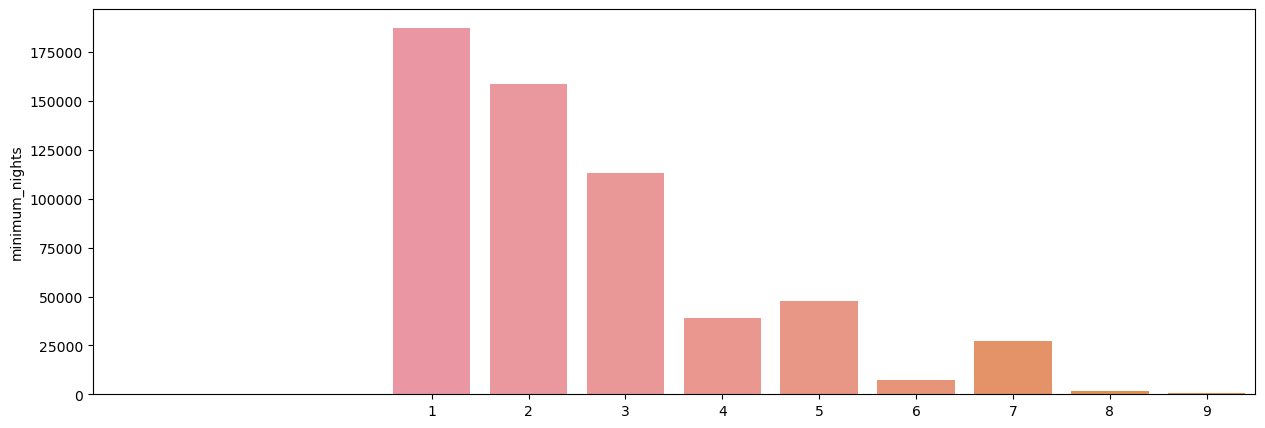

In [92]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

In [93]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'minimum_nights')
print('{} linhas removidas'.format(linhas_removidas))

40383 linhas removidas


### maximum_nights

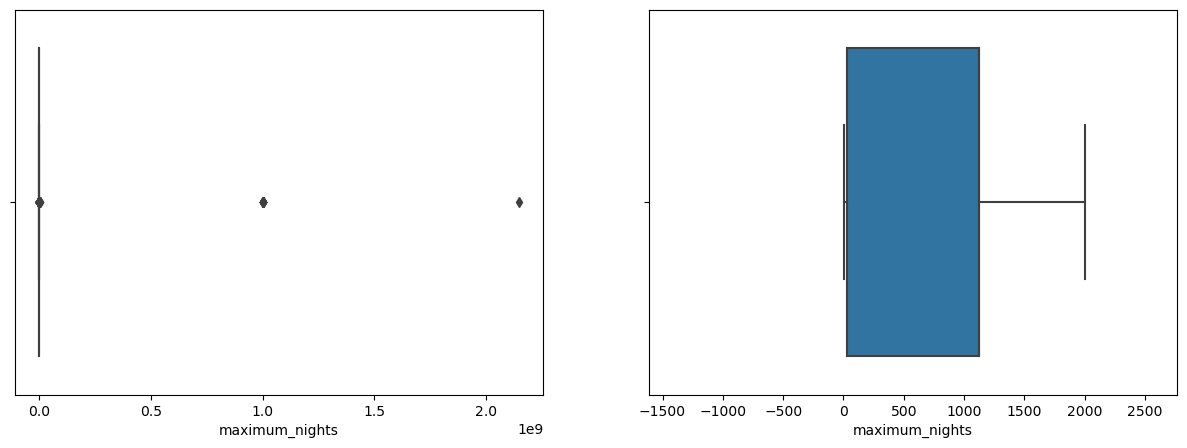

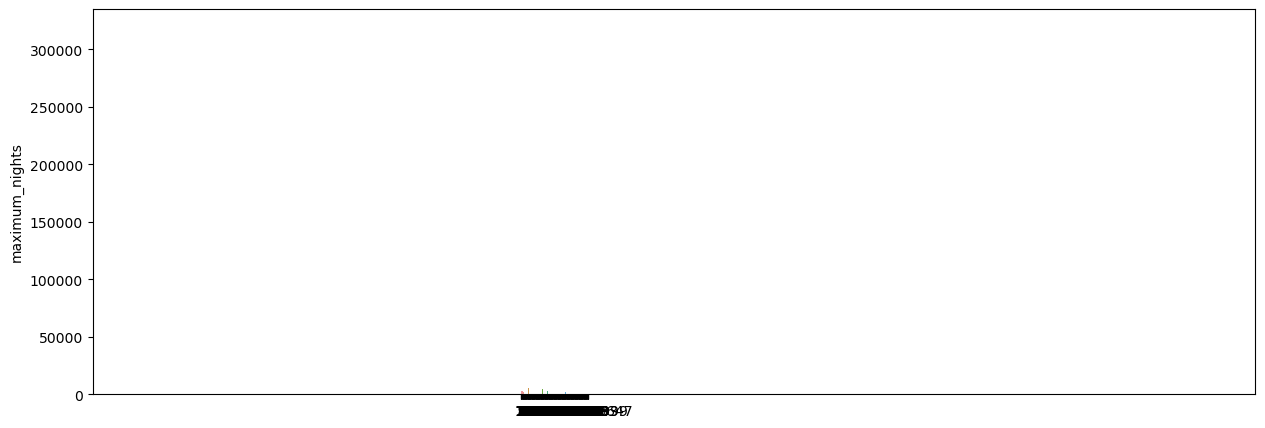

In [94]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

O feature maximum_nights também não parece ser relevante para a análise, portanto iremos excluir do modelo.

In [96]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)

base_airbnb.shape

(581983, 21)

### number_of_reviews

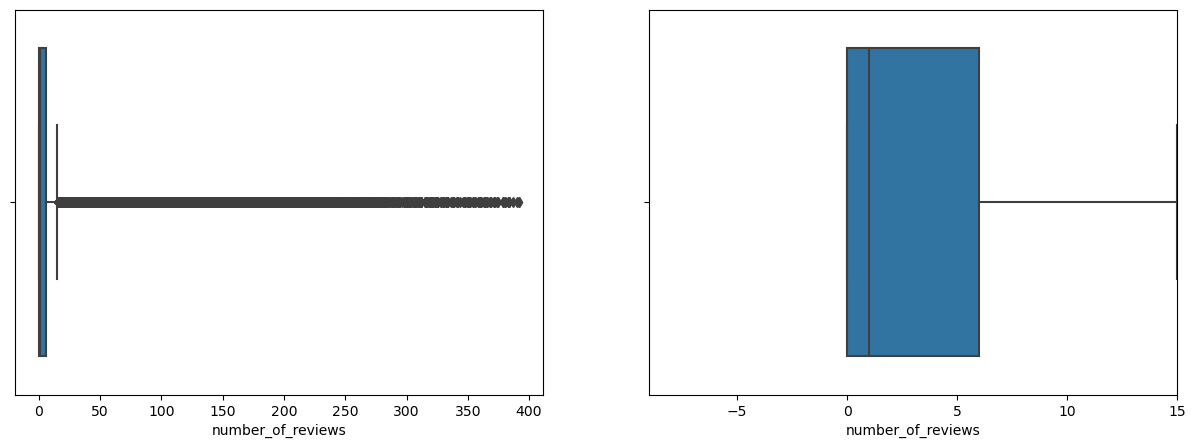

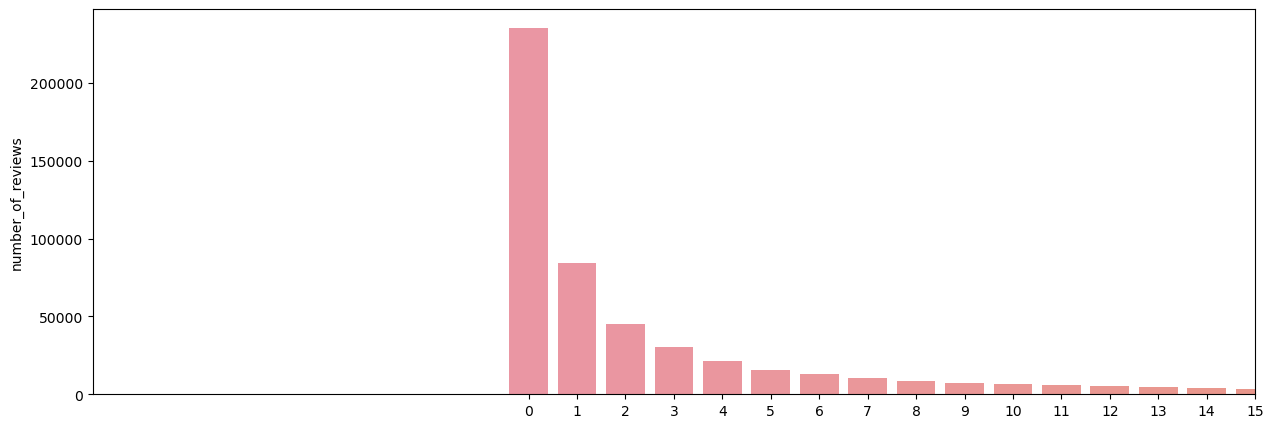

In [97]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

A feature number_of_reviews, apesar de ser uma feature importante pois pode indicar os superhosts e a maneira que estes precificam seus imóveis, não parece ser um ponto relevante o suficiente para novos hosts que estão buscando anunciar seus imóveis, então iremos retirar da nossa análise.

In [99]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)

base_airbnb.shape

(581983, 20)

### Tratamento de Colunas de Valores de Texto

### property_type

In [100]:
print(base_airbnb['property_type'].value_counts())

Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

Nos valores acima, podemos inferir que os valores são muito pulverizados. Para fins de análise, iremos agrupar as categorias pulverizadas no grupo "Outros".

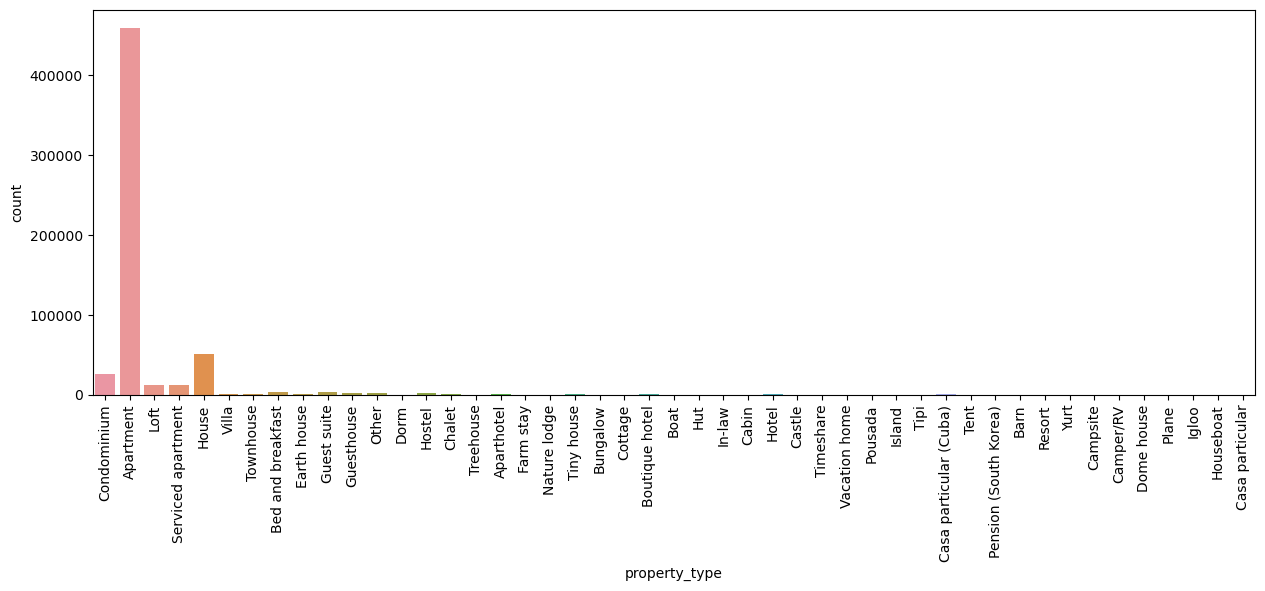

In [107]:
plt.figure(figsize=(15,5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

In [112]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()

colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo]<2000:
        colunas_agrupar.append(tipo)

print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type']==tipo, 'property_type'] = 'Outros'
    
print(base_airbnb['property_type'].value_counts())

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'Igloo', 'In-law', 'Vacation home', 'Timeshare', 'Pousada', 'Houseboat', 'Casa particular', 'Plane']
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: property_type, dtype: int64


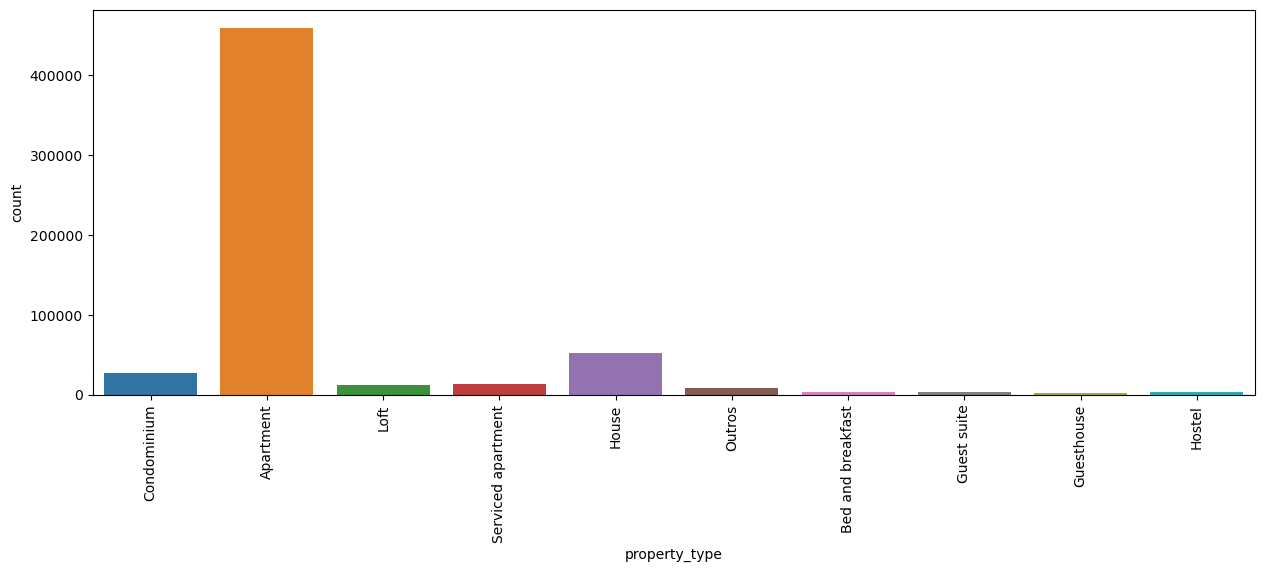

In [113]:
plt.figure(figsize=(15,5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### room_type

In [115]:
print(base_airbnb['room_type'].value_counts())

Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: room_type, dtype: int64


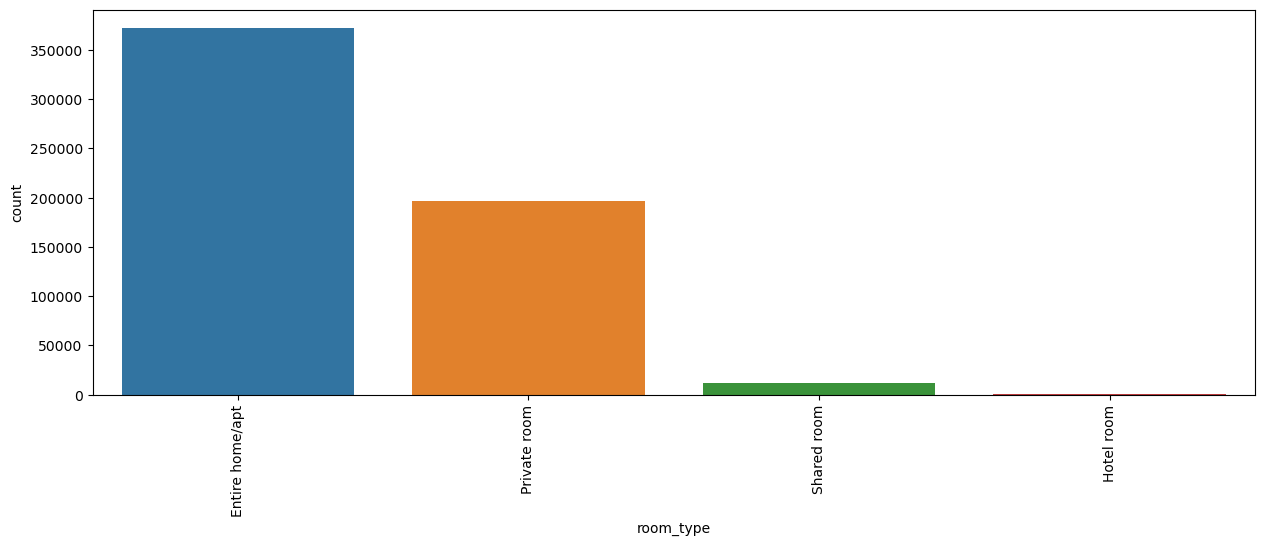

In [116]:
plt.figure(figsize=(15,5))
grafico = sns.countplot(x='room_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### bed_type

In [117]:
print(base_airbnb['bed_type'].value_counts())

Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: bed_type, dtype: int64


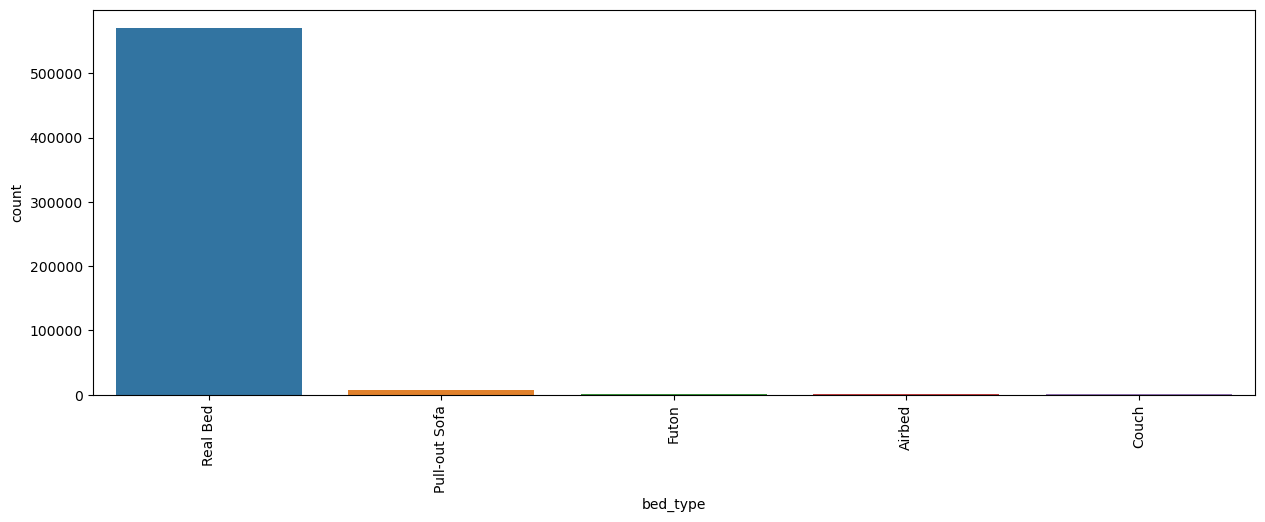

In [118]:
plt.figure(figsize=(15,5))
grafico = sns.countplot(x='bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

In [125]:
#Agrupando categorias de bed_type

tabela_bed = base_airbnb['bed_type'].value_counts()

colunas_agrupar = []

for tipo in tabela_bed.index:
    if tabela_bed[tipo]<10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type']==tipo, 'bed_type'] = 'Outros'
    
print(base_airbnb['bed_type'].value_counts())

['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
Real Bed    570643
Outros       11340
Name: bed_type, dtype: int64


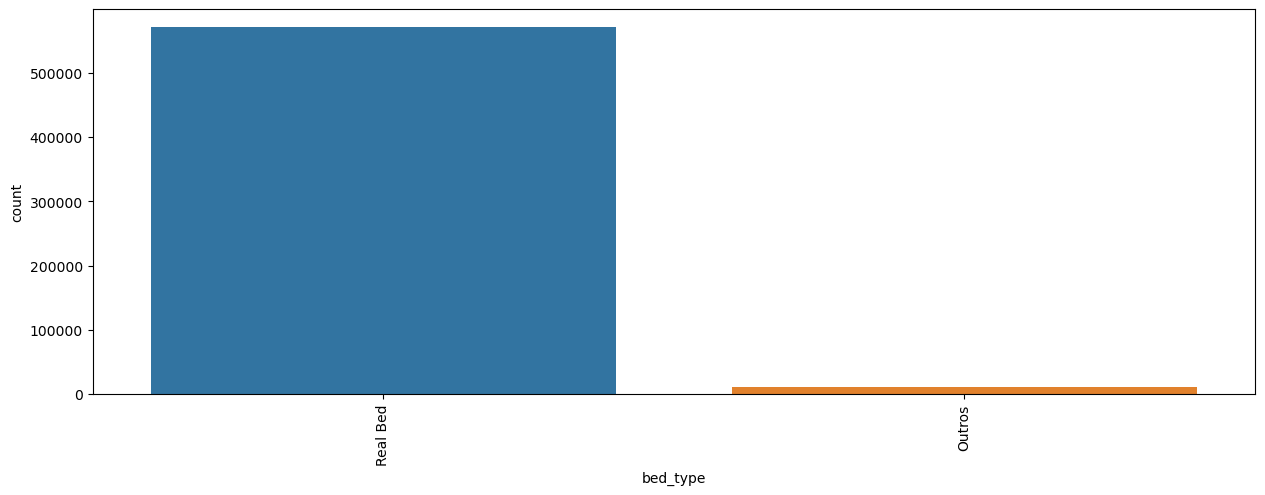

In [126]:
plt.figure(figsize=(15,5))
grafico = sns.countplot(x='bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

Para o caso acima, apesar de uma categoria ter muito mais valores que as outras, poderiamos agrupar o resto na categoria Outros, ou manter da maneira como está.

### cancellation_policy

In [119]:
print(base_airbnb['cancellation_policy'].value_counts())

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: cancellation_policy, dtype: int64


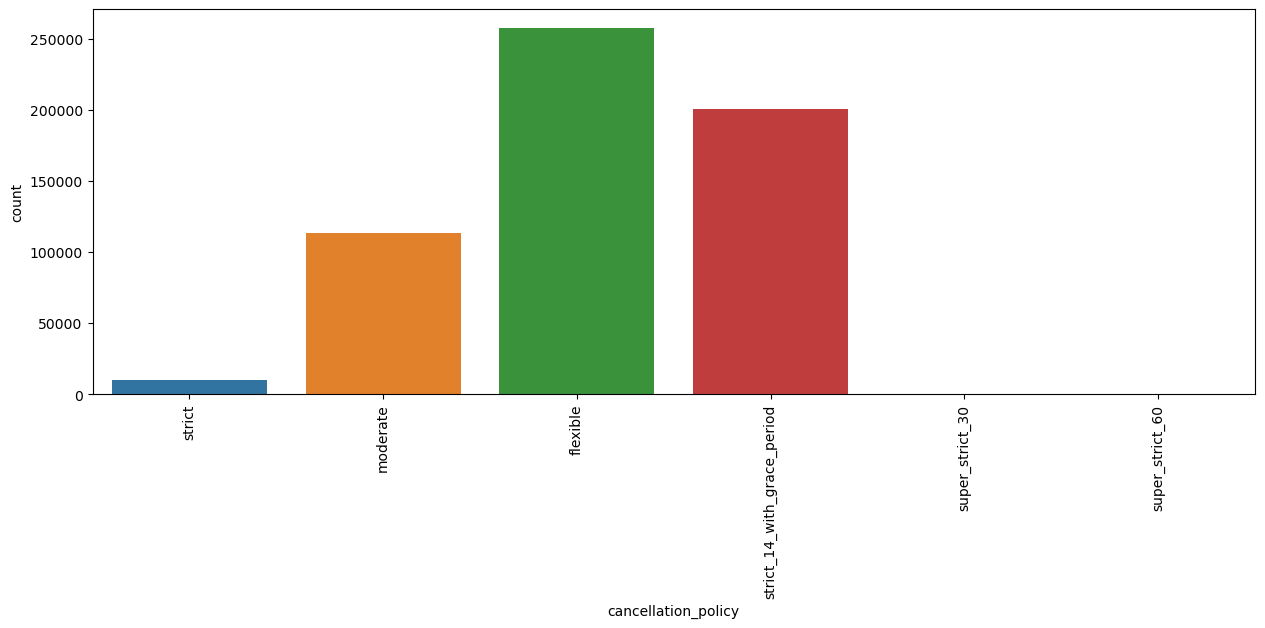

In [120]:
plt.figure(figsize=(15,5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

In [123]:
#Agrupando categorias do cancellation_policy

tabela_cancellation = base_airbnb['cancellation_policy'].value_counts()

colunas_agrupar = []

for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo]<10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy']==tipo, 'cancellation_policy'] = 'Strict'
    
print(base_airbnb['cancellation_policy'].value_counts())

['Outros']
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
Strict                           9863
Name: cancellation_policy, dtype: int64


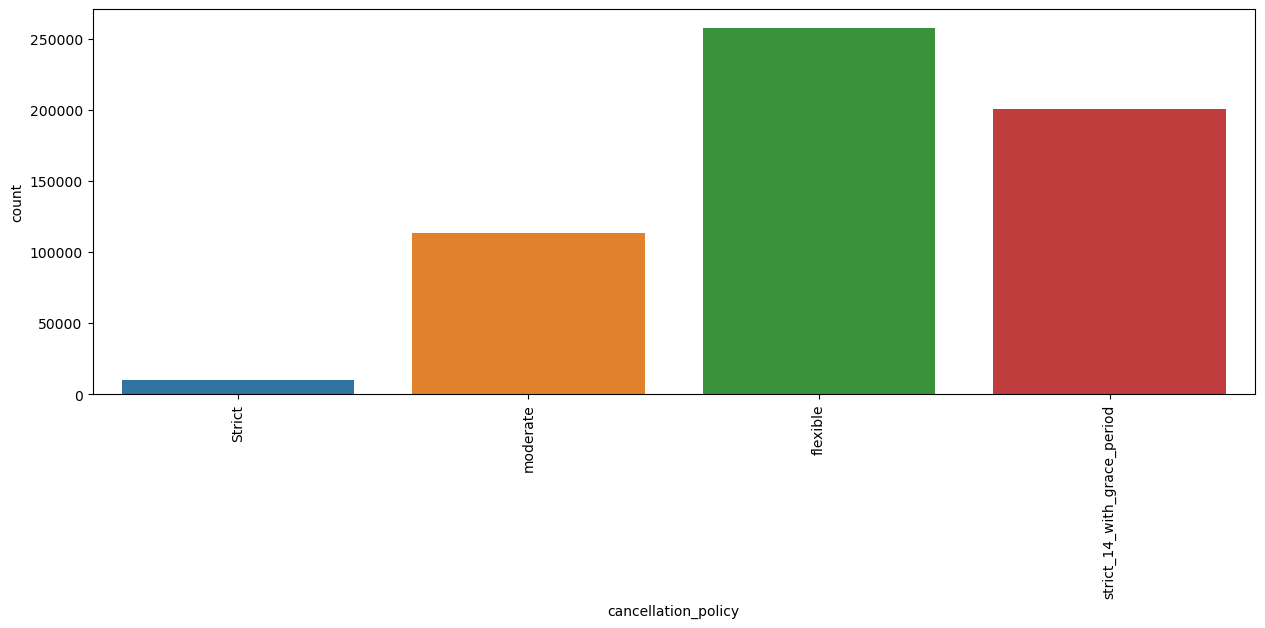

In [124]:
plt.figure(figsize=(15,5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### amenities

In [128]:
print(base_airbnb['amenities'].iloc[0])

{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,"Paid parking off premises","Smoking allowed",Doorman,Elevator,"Hot tub","Family/kid friendly","Suitable for events",Essentials,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in","Front desk/doorperson","Private entrance","Hot water","Bed linens","Luggage dropoff allowed"}


- Devido à pluralidade na coluna de amenities, vamos analisá-la de outra forma: vamos contar a quantidade de amenities presente em cada imóvel.
- Mas devemos ter atenção, pois não necessariamente o imóvel possui mais atributos; o host pode ser apenas mais detalhista.

In [130]:
base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

In [132]:
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

(581983, 20)

In [ ]:
plt.figure(figsize=(15,5))
grafico = sns.countplot(x='room_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

Com a nova coluna de amenities, está se tornou uma coluna numérica. Por isso, iremos aplicar a análise que fizemos para as outras colunas numéricas para ela.

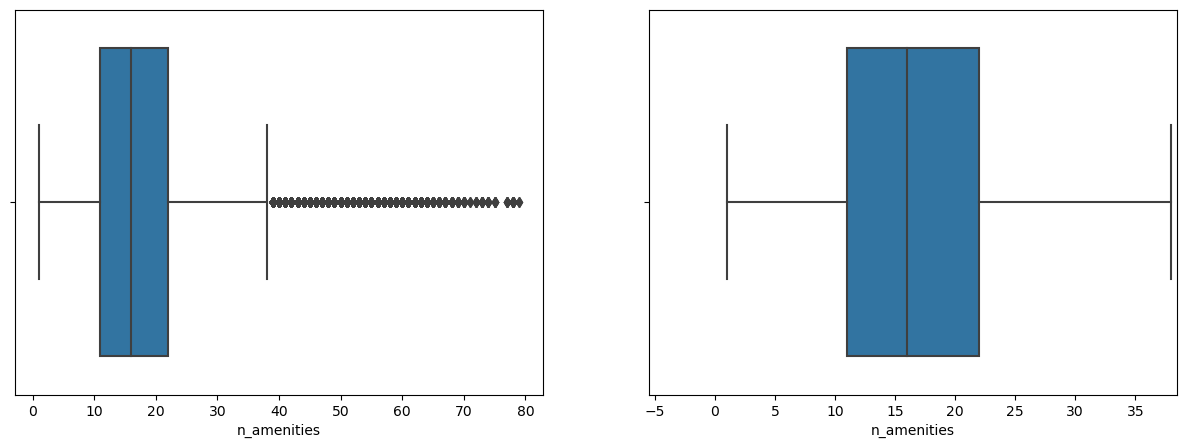

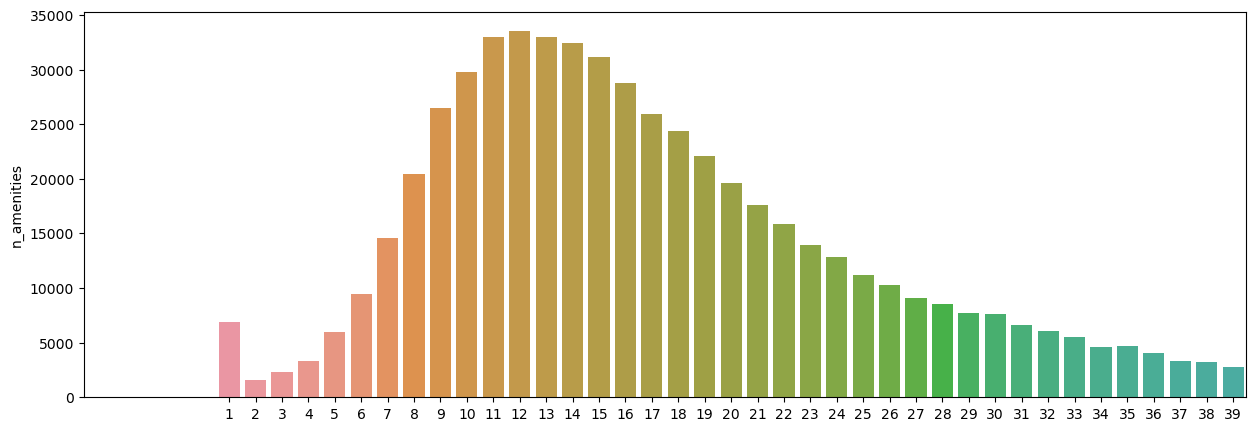

In [133]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

In [134]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'n_amenities')
print('{} linhas removidas'.format(linhas_removidas))

24343 linhas removidas


### Visualização de Mapa das Propriedades

In [144]:
amostra = base_airbnb.sample(n=50000)
centro_mapa ={'lat':amostra.latitude.mean(),'lon':amostra.longitude.mean()}


mapa=px.density_mapbox(amostra, lat='latitude', lon='longitude', 
                   z='price', radius=2.5, center=centro_mapa, 
                   zoom=10, mapbox_style='stamen-terrain')
mapa.show()

### Encoding

Nesta etapa, iremos transformar as colunas de texto em colunas numéricas para treinar o modelo.

- Features de Valores True ou False, vamos substituir True por 1 e False por 0.
- Features de Categorias (features em que os valores da coluna são textos) vamos utilizar o método de encoding de variáveis dummies.

In [148]:
print(base_airbnb.columns)
    
print(base_airbnb.iloc[0])

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'extra_people', 'minimum_nights',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'ano', 'mes', 'n_amenities'],
      dtype='object')
host_is_superhost                         t
host_listings_count                     2.0
latitude                         -22.965919
longitude                        -43.178962
property_type                   Condominium
room_type                   Entire home/apt
accommodates                              5
bathrooms                               1.0
bedrooms                                2.0
beds                                    2.0
bed_type                           Real Bed
price                                 270.0
extra_people                           51.0
minimum_nights                            4
instant_bookable       

In [147]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
base_airbnb_cod= base_airbnb.copy()

for coluna in colunas_tf:
    base_airbnb_cod.loc[base_airbnb[coluna]=='t',coluna] = 1
    base_airbnb_cod.loc[base_airbnb[coluna]=='f',coluna] = 0
    
print(base_airbnb_cod.iloc[0])

host_is_superhost                         1
host_listings_count                     2.0
latitude                         -22.965919
longitude                        -43.178962
property_type                   Condominium
room_type                   Entire home/apt
accommodates                              5
bathrooms                               1.0
bedrooms                                2.0
beds                                    2.0
bed_type                           Real Bed
price                                 270.0
extra_people                           51.0
minimum_nights                            4
instant_bookable                          1
is_business_travel_ready                  0
cancellation_policy                  Strict
ano                                    2018
mes                                       4
n_amenities                              25
Name: 1, dtype: object


In [151]:
colunas_categorias = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias)

#Nesta etapa, fica evidente a importância de não termos muitas variáveis em uma mesma categoria; desta forma, nossa base de dados não fica tão pesada.


display(base_airbnb_cod.head())

host_is_superhost  host_listings_count   latitude  longitude  accommodates  \
1                 1                  2.0 -22.965919 -43.178962             5   
3                 0                  3.0 -22.977117 -43.190454             3   
4                 1                  1.0 -22.983024 -43.214270             3   
5                 1                  1.0 -22.988165 -43.193588             3   
6                 1                  1.0 -22.981269 -43.190457             2   

   bathrooms  bedrooms  beds  price  extra_people  ...  \
1        1.0       2.0   2.0  270.0          51.0  ...   
3        1.0       1.0   2.0  161.0          45.0  ...   
4        1.0       1.0   2.0  222.0          68.0  ...   
5        1.5       1.0   2.0  308.0          86.0  ...   
6        1.0       1.0   2.0  219.0          80.0  ...   

   room_type_Entire home/apt room_type_Hotel room room_type_Private room  \
1                          1                    0                      0   
3                          1                    0                      0   
4                          1                    0                      0   
5                          1                    0                      0   
6                          1                    0                      0   

   room_type_Shared room  bed_type_Outros  bed_type_Real Bed  \
1                      0                0                  1   
3                      0                0                  1   
4                      0                0                  1   
5                      0                0                  1   
6                      0                0                  1   

   cancellation_policy_Strict  cancellation_policy_flexible  \
1                           1                             0   
3                           1                             0   
4                           1                             0   
5                           1                             0   
6                           1                             0   

   cancellation_policy_moderate  \
1                             0   
3                             0   
4                             0   
5                             0   
6                             0   

   cancellation_policy_strict_14_with_grace_period  
1                                                0  
3                                                0  
4                                                0  
5                                                0  
6                                                0  

[5 rows x 36 columns]

### Modelo de Previsão

- Vamos criar uma função onde teremos a coluna de previsão e a com os valores reais, para que possamos comparar e ver qual o modelo que melhor se encaixa.
- Abaixo, o y_teste terá os valores reais, e a previsao nos mostrará os valores que o modelo preveu.

#### Métricas de Avaliação

In [165]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

#### Escolha dos Modelos a Serem Testados
    1. RandomForest
    2. LinearRegression
    3. Extra Tree

In [162]:
modelo_rf = RandomForestRegressor() 
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos ={'RadomForest': modelo_rf,
         'LinearRegression': modelo_lr,
         'ExtraTrees': modelo_et
         }

#Nosso y será o valor que queremos descobrir, neste caso, o preço ('price')
#Nosso x será todas as colunas, menos o valor que queremos descobrir, neste caso, o preço ('price')

y = base_airbnb_cod['price'] 
x = base_airbnb_cod.drop('price', axis=1)

#### Separação dos dados em treino e teste + Treino do Modelo

- Separando os dados entre treino e teste, devemos setar o random_state em um número qualquer, para que, ao rodar o mesmo código mais de uma vez, ele não nos retorne dados diferentes.

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(x_train, y_train)
    #testar
    previsao = modelo.predict(x_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RadomForest:
R²:0.9725178020939858
RSME:43.96022375683213
Modelo LinearRegression:
R²:0.3270168790140865
RSME:217.53855974042645
Modelo ExtraTrees:
R²:0.9750594529575402
RSME:41.87811743648179


### Análise do Melhor Modelo

In [166]:
for nome_modelo, modelo in modelos.items():
    #testar
    previsao = modelo.predict(x_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RadomForest:
R²:97.25%
RSME:43.96
Modelo LinearRegression:
R²:32.70%
RSME:217.54
Modelo ExtraTrees:
R²:97.51%
RSME:41.88


- Modelo Escolhido como Melhor Modelo, de acordo com os resultados acima: <b>ExtraTreesRegressor</b>, pois foi melhor nas duas métricas de comparação.
- Esse foi o modelo com maior valor de R² e ao mesmo tempo o menor valor de RSME. Como não tivemos uma grande diferença de velocidade de treino e de previsão desse modelo de RandomForest (que teve resultados próximos de R² e RSME, iremos escolher o Modelo ExtraTrees.
- O modelo de regressão linear não obteve um resultado satisfatório, com valores de R² e RSME muito piores que os outros 2 modelos.
- Resultados das Métricas de Avaliação no Modelo Vencedor:<br>
Modelo ExtraTrees:<br>
R²:97.51%<br>
RSME:41.88<br>

### Ajustes e Melhorias no Melhor Modelo

- O parâmetro feature_importances_ nos fornece a importância de cada uma das variáveis, na ordem que as passamos no x_train

In [167]:
print(modelo_et.feature_importances_)

[0.01338185 0.03988929 0.1043018  0.10164961 0.07400407 0.06773876
 0.1172632  0.05285176 0.08703343 0.06570304 0.02159261 0.
 0.01131096 0.00470229 0.08904007 0.01281627 0.00128097 0.00521189
 0.00066466 0.00092385 0.00062199 0.00685894 0.00214013 0.00241763
 0.00221292 0.06266329 0.00031438 0.00407788 0.00190729 0.00270768
 0.00264736 0.0008399  0.01955945 0.01203065 0.00764012]


In [168]:
print(x_train.columns)

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'extra_people',
       'minimum_nights', 'instant_bookable', 'is_business_travel_ready', 'ano',
       'mes', 'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Outros',
       'bed_type_Real Bed', 'cancellation_policy_Strict',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')


In [171]:
importancia_features = pd.DataFrame(modelo_et.feature_importances_,x_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)

0
bedrooms                                         0.117263
latitude                                         0.104302
longitude                                        0.101650
n_amenities                                      0.089040
extra_people                                     0.087033
accommodates                                     0.074004
bathrooms                                        0.067739
minimum_nights                                   0.065703
room_type_Entire home/apt                        0.062663
beds                                             0.052852
host_listings_count                              0.039889
instant_bookable                                 0.021593
cancellation_policy_flexible                     0.019559
host_is_superhost                                0.013382
property_type_Apartment                          0.012816
cancellation_policy_moderate                     0.012031
ano                                              0.011311
cancellation_policy_strict_14_with_grace_period  0.007640
property_type_House                              0.006859
property_type_Condominium                        0.005212
mes                                              0.004702
room_type_Private room                           0.004078
bed_type_Outros                                  0.002708
bed_type_Real Bed                                0.002647
property_type_Outros                             0.002418
property_type_Serviced apartment                 0.002213
property_type_Loft                               0.002140
room_type_Shared room                            0.001907
property_type_Bed and breakfast                  0.001281
property_type_Guesthouse                         0.000924
cancellation_policy_Strict                       0.000840
property_type_Guest suite                        0.000665
property_type_Hostel                             0.000622
room_type_Hotel room                             0.000314
is_business_travel_ready                         0.000000

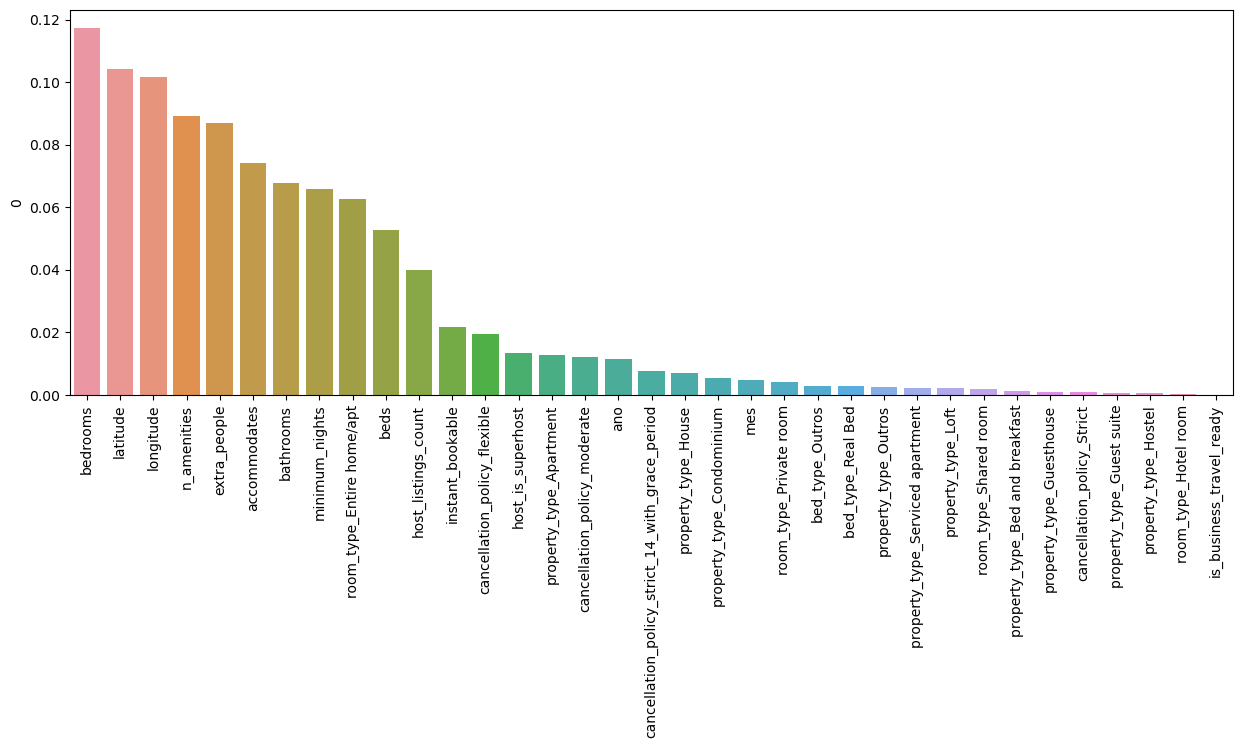

In [175]:
#Agora, iremos plotar as features para analisar quais são as mais relevantes na análise.

plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_features.index,y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

#### Ajustes Finais no Modelo

- is_business_travel_ready não parece ter muito impacto no nosso modelo. Por isso, para chegar em um modelo mais simples, vamos excluir nossa feature e rodar o modelo sem ela.

In [177]:
base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready', axis=1)

y = base_airbnb_cod['price']
x = base_airbnb_cod.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

#Não precisamos testar todos os modelos de previsão, apenas rodamos o modelo escolhido (ExtraTrees)
modelo_et.fit(x_train, y_train)
previsao = modelo_et.predict(x_test)
print(avaliar_modelo('ExtraTrees', y_test, previsao))

Modelo ExtraTrees:
R²:97.49%
RSME:42.05


- Para testes:
1. Podemos testar retirando colunas específicas.
2. Não deletar os outliers.
- Para suposições:
1. Podemos acrescentar ao nosso projeto uma lista de suposições inferidas após a análise inicial dos dados do modelo.
2. Os testes pode ser guiados de acordo com estas suposições.

#### Observação para os testes
- Tomar cuidado com as colunas criadas no encoding, pelo dummies, pois estas podem ter menos impacto de acordo com a análise final, mas foram consideradas para o modelo.
- Indicado criar uma base_teste, que copia nossa base original, para que os nossos dados não sejam alterados.
- Para deletar uma coluna dummies, criar um for para procurar o texto chave em todas as colunas da base.

- bed_type não parece ter muito impacto no nosso modelo. Por isso, para chegar em um modelo mais simples, vamos excluir nossa feature e rodar o modelo sem ela.

In [180]:
base_teste = base_airbnb_cod.copy()

for coluna in base_teste:
    if 'bed_type' in coluna:
        base_teste = base_teste.drop(coluna, axis=1)
        
print(base_teste.columns)

y = base_teste['price']
x = base_teste.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

#Não precisamos testar todos os modelos de previsão, apenas rodamos o modelo escolhido (ExtraTrees)
modelo_et.fit(x_train, y_train)
previsao = modelo_et.predict(x_test)
print(avaliar_modelo('ExtraTrees', y_test, previsao))

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'extra_people', 'minimum_nights', 'instant_bookable', 'ano', 'mes',
       'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_Strict', 'cancellation_policy_flexible',
       'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')
Modelo ExtraTrees:
R²:97.50%
RSME:41.90


- Após a análise acima, notamos que, apesar de a exclusão das colunas com bed_type influenciar no nosso resultado, a alteração nas métricas não foi grande o suficiente para justificá-las no nosso DataFrame.
- Além disso, o nosso modelo foi simplificado e precisa de menos dados para chegar aos mesmos resultados.

### Deploy do Projeto
- Passo 1 -> Criar arquivo do modelo (joblib)
- Passo 2 -> Escolher a dorma de deploy:
    - Arquivo Executável + Tkinter
    - Deploy em um Microsite (Flask)
    - Deploy apenas para uso direto (Streamlit)
- Passo 3 -> Outro arquivo Python (pode ser Jupyter ou PyCharm)
- Passo 4 -> Importar streamlit e criar código
- Passo 5 -> Atribuir botão ao carregamento do modelo
- Passo 6 -> Deploy feito

In [181]:
#Salvando nossa base 'limpa' em csv

x['price'] = y 
x.to_csv('dados.csv')

In [183]:
#Joblib irá salvar nosso modelo para ser usado em outra análise, sem que seja necessário rodar todo o Projeto novamente.

import joblib
joblib.dump(modelo_et, 'modelo.joblib')

['modelo.joblib']